In [2]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import sys
import os
sys.path.append('/home/g007markphillip/language_classification/')
from src.config import Config
from src.models import transformer
from src.losses import weighted_loss
import numpy as np

['/home/g007markphillip/language_classification/notebooks', '/home/g007markphillip/anaconda3/envs/tf/lib/python39.zip', '/home/g007markphillip/anaconda3/envs/tf/lib/python3.9', '/home/g007markphillip/anaconda3/envs/tf/lib/python3.9/lib-dynload', '', '/home/g007markphillip/anaconda3/envs/tf/lib/python3.9/site-packages', '/home/g007markphillip/language_classification/src', '/home/g007markphillip/language_classification/']


In [3]:
config=Config()
count=config.count
max_length = config.max_length

In [4]:
new_data = pd.read_csv('../data/processed/processed_1.csv')

In [5]:
train_data=new_data[new_data.folds.isin([0,1,2])].reset_index(drop=True)
# train_data=shuffle(train_data).reset_index().drop(columns='index')
val_data = new_data[new_data.folds==3].reset_index().drop(columns='index')
test_data = new_data[new_data.folds==4].reset_index().drop(columns='index')

In [6]:
train_data

,text,folds,acholi,english,luganda,lumasaba,runyankore,swahili
0,the government has constructed better health c...,0,0,1,0,0,0,0
1,his death was so sudden,0,0,1,0,0,0,0
2,our company celebrated twenty years of existen...,0,0,1,0,0,0,0
3,many people have lost their lives due to sexua...,0,0,1,0,0,0,0
4,civil servants receive their pension fund upon...,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...
37936,kureka ku yaataire amaisho aha bi ruhanga yaar...,2,0,0,0,0,1,0
37937,kandi yaamanyira kimwe ngu eki ruhanga yaaraga...,2,0,0,0,0,1,0
37938,nikyo okwikiriza kwe kwamubariirwe okuba okuhi...,2,0,0,0,0,1,0
37939,tikiramuhandiikiirwe wenka ngu kikamubarirwa o...,2,0,0,0,0,1,0


In [7]:
train_data.iloc[:,2:].sum()

acholi        8768
english       2860
luganda       4023
lumasaba      6695
runyankore    9595
swahili       6000
dtype: int64

In [8]:
tokenizer = Tokenizer(num_words=count)
tokenizer.fit_on_texts(train_data.text)

In [9]:
train_sequences=tokenizer.texts_to_sequences(train_data.text)
train_padded_sequences = pad_sequences(train_sequences,maxlen=max_length,padding='post',truncating='post')

val_sequences=tokenizer.texts_to_sequences(val_data.text)
val_padded_sequences = pad_sequences(val_sequences,maxlen=max_length,padding='post',truncating='post')

test_sequences=tokenizer.texts_to_sequences(test_data.text)
test_padded_sequences = pad_sequences(test_sequences,maxlen=max_length,padding='post',truncating='post')

In [10]:
train_data.iloc[:,2:].sum()

acholi        8768
english       2860
luganda       4023
lumasaba      6695
runyankore    9595
swahili       6000
dtype: int64

In [11]:
cp_callback = tf.keras.callbacks.ModelCheckpoint(
                    filepath='/home/g007markphillip/language_classification/weights/weights2/cp-{epoch:04d}.ckpt',
                    save_weights_only=True,
                    save_freq='epoch')


model = transformer()
optimizer = tf.keras.optimizers.Adam(1e-4)
# loss = weighted_loss(np.array([2.21132326,0.72121855,1.57183694,0.94453905,0.65898622,1.05391667]))
# np.array([0.72121855, 2.21132326, 1.57183694, 0.94453905, 0.65898622,
#        1.05391667])
# 'acholi', 'english', 'luganda', 'lumasaba', 'runyankore',
#        'swahili'
model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()
model.fit(train_padded_sequences, train_data[['english','acholi','luganda','lumasaba','runyankore','swahili']].values,
      validation_data=(val_padded_sequences ,val_data[['english','acholi','luganda','lumasaba','runyankore','swahili']].values),
      epochs=40,
      batch_size=512,
      callbacks=[cp_callback])

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


2022-08-02 22:37:44.928056: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-08-02 22:37:44.929228: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2022-08-02 22:37:47.409916: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-02 22:37:47.410738: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla K80 computeCapability: 3.7
coreClock: 0.8235GHz coreCount: 13 deviceMemorySize: 11.17GiB deviceMemoryBandwidth: 223.96GiB/s
2022-08-02 22:37:47.410779: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2022-08-02 22:37:47.412762: I tensorflow/stream_executor/platform/default/dso_lo

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 16)]              0         
_________________________________________________________________
token_and_position_embedding (None, 16, 32)            2929056   
_________________________________________________________________
transformer_block (Transform (None, 16, 32)            46272     
_________________________________________________________________
global_average_pooling1d (Gl (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 198       
Total params: 2,976,582
Trainable params: 2,976,582
Non-trainable params: 0
___________________________________________________

2022-08-02 22:37:48.537380: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-08-02 22:37:48.537957: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2299995000 Hz
2022-08-02 22:37:50.300592: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10


75/75 [==============================] - 6s 60ms/step - loss: 1.6955 - accuracy: 0.3035 - val_loss: 1.3643 - val_accuracy: 0.5397
Epoch 2/40
75/75 [==============================] - 4s 47ms/step - loss: 1.2344 - accuracy: 0.6312 - val_loss: 0.9810 - val_accuracy: 0.6639
Epoch 3/40
75/75 [==============================] - 3s 45ms/step - loss: 0.8218 - accuracy: 0.7650 - val_loss: 0.6418 - val_accuracy: 0.7929
Epoch 4/40
75/75 [==============================] - 3s 46ms/step - loss: 0.4923 - accuracy: 0.8648 - val_loss: 0.3960 - val_accuracy: 0.9023
Epoch 5/40
75/75 [==============================] - 3s 45ms/step - loss: 0.2732 - accuracy: 0.9577 - val_loss: 0.2622 - val_accuracy: 0.9385
Epoch 6/40
75/75 [==============================] - 3s 45ms/step - loss: 0.1460 - accuracy: 0.9865 - val_loss: 0.1904 - val_accuracy: 0.9512
Epoch 7/40
75/75 [==============================] - 3s 46ms/step - loss: 0.0844 - accuracy: 0.9932 - val_loss: 0.1513 - val_accuracy: 0.9579
Epoch 8/40
75/75 [======

In [12]:
# tf.train.latest_checkpoint('/home/g007markphillip/language_classification/weights/')
# model.load_weights('/home/g007markphillip/language_classification/weights/weights2/cp-0001.ckpt')

In [12]:
import numpy as np
pred_values=model.predict(test_padded_sequences)
pred_values = np.argmax(pred_values,1).astype('int')
true_values=test_data[['english','acholi','luganda','lumasaba','runyankore','swahili']].values
true_values=np.argmax(true_values,1).astype('int')

In [13]:
pred_values

array([0, 0, 0, ..., 4, 4, 4])

In [14]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm=confusion_matrix(true_values,pred_values)

cm_df=pd.DataFrame(cm,index=['english','acholi','luganda','lumaasaba','runyankore','swahili'],\
                   columns=['english','acholi','luganda','lumaasaba','runyankore','swahili'])

Text(0.5, 15.0, 'Y_PRED')

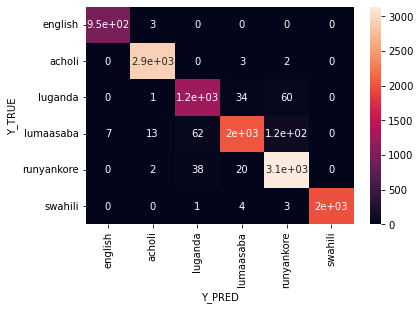

In [15]:
import matplotlib.pyplot as plt
sns.heatmap(cm_df,annot=True)
plt.ylabel('Y_TRUE')
plt.xlabel('Y_PRED')

In [33]:
train_data

,text,folds,acholi,english,luganda,lumasaba,runyankore,swahili
0,the government has constructed better health c...,0,0,1,0,0,0,0
1,his death was so sudden,0,0,1,0,0,0,0
2,our company celebrated twenty years of existen...,0,0,1,0,0,0,0
3,many people have lost their lives due to sexua...,0,0,1,0,0,0,0
4,civil servants receive their pension fund upon...,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...
37936,kureka ku yaataire amaisho aha bi ruhanga yaar...,2,0,0,0,0,1,0
37937,kandi yaamanyira kimwe ngu eki ruhanga yaaraga...,2,0,0,0,0,1,0
37938,nikyo okwikiriza kwe kwamubariirwe okuba okuhi...,2,0,0,0,0,1,0
37939,tikiramuhandiikiirwe wenka ngu kikamubarirwa o...,2,0,0,0,0,1,0
